# Dark Matter Freeze Out
## Initial imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve
from scipy.misc import derivative
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
import seaborn as sns
from IPython.display import Latex

sns.set(rc={'text.usetex' : True})
sns.set_context("paper", font_scale=2)
sns.set_style("ticks", {'axes.grid': False,
                        'axes.linewidth': 1.5,
                        'legend.frameon':True,
                        'useTex':True})

## $g_{*S}$ and $g_*$ extracted from plot in Cosmology Lecture Notes

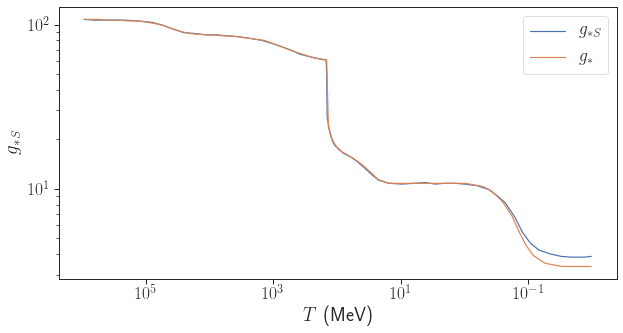

In [2]:
gstar_data = np.genfromtxt('gstar.csv', delimiter=',')

# Convert temperatures to eV instead of MeV:
Ts_S=gstar_data[:,0]*10**6
Ts=gstar_data[:,2]*10**6

# Interpolate:
gstar_S=interp1d(Ts_S, gstar_data[:,1],kind='nearest',fill_value='extrapolate')
gstar=interp1d(Ts, gstar_data[:,3],kind='nearest',fill_value='extrapolate')

# Replicate plots from Lecture Notes:
plt.figure(figsize=(10,5))
plt.plot(Ts_S*10**-6,gstar_S(Ts_S), label=r'$g_{*S}$')
plt.plot(Ts*10**-6,gstar(Ts), label=r'$g_{*}$')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$g_{*S}$')
plt.xlabel(r'$T$ (MeV)')
plt.gca().invert_xaxis()
plt.legend()
plt.show()

## Converting between $a$ and $T$:

$$a^3g_{*S}(T)T^3=\text{const}$$

In [3]:
# This is useful for the instantaneous decoupling approximation:
def T_to_a(T):
    """
    Converts from T to a
    """
    return (gstar_S(T_0)/gstar_S(T))**(1/3)*(T_0/T)
def a_to_T(a):
    """
    Converts from a to T
    """
    func = lambda T: a**3*(gstar_S(T))*T**3-gstar_S(T_0)*T_0**3
    T_initial_guess = gstar_S(T_0)**(1/3)*(T_0/a)
    T_solution = fsolve(func, T_initial_guess)
    return T_solution

# for testing:
T_0 = 0.235e-3
a_test = T_to_a(100)
a_to_T(a_test)

array([100.])

# Instantaneous Freeze-Out

We need to create plots of $\Omega_{\text{DM}}(m_{\text{DM}})$ and  $\Omega_{\text{DM}}(\sigma_{\text{DM-DM}})$

$$\Omega_{\text{DM}}=\frac{\rho_{\text{DM}}}{\rho_{\text{crit}}}$$

Here, $\rho_{\text{DM}}$ is the present value, which can be obtained as follows: 

We calculate $n_{\text{DM}}$ at decoupling, redshift it and then do $\rho_{\text{DM}}= n_{\text{DM},0}m_{\text{DM}}$, where $n_{\text{DM},0}$ can be obtained from the value at decoupling using $n_{\text{DM},0}=n_{\text{DM}}a^{-3}$

For cold dark matter (non-relativistic case):

$$n_{\text{DM}}=g\left(\frac{m_{\text{DM}}T}{2\pi}\right)^{3/2}e^{-m_{\text{DM}}/T}$$

For hot dark matter (relativistic case):

$$n_{\text{DM}}=\frac{\zeta(3)}{\pi^2}gT^3 \text{ for bosons, or }n_{\text{DM}}=\frac34\frac{\zeta(3)}{\pi^2}gT^3 \text{ for fermions.}$$

Let us first assume that the cross section for DM-DM interactions is
$$ \sigma_{\text{DM-DM}}=G_F^2T^2$$

The Hubble parameter, in the radiation dominated universe, is given by:
$$ H(T)=\frac{\pi}{3}\left(\frac{g_*}{10}\right)^{1/2}\frac{T^2}{M_{\text{Pl}}} $$

Using the equipartition theorem, we can compute the velocity of a gas of particles at a temperature $T$:
$$v=\sqrt{\frac{3k_BT}{m_{DM}}}$$

Assuming decoupling was instantaneous, we need to find the freeze-out temperature by equating the interaction rate and the Hubble rate:
$$H(T_{fo})=\Gamma(T_{fo})\Leftrightarrow H(T_{fo})=n(T_{fo})\sigma(T_{fo})v(T_{fo})$$

# Gradual Freeze Out

Evolution of the number of dark matter particles:

\begin{equation}
\frac{dn}{dt}+3Hn=\frac{d(na^3)}{a^3dt}=\langle\sigma v\rangle(n_{eq}^2-n^2)
\end{equation}

Replacing $n$ with $Y=n/s$, we can rewrite this equation as:

$$ \frac{dY}{dx}=\frac{s\langle\sigma v\rangle}{Hx}\left(1+\frac13\frac{d(\log g_s)}{d(\log T)}\right)(Y_{eq}^2-Y^2) $$

Here, $x=m/T$.

After calculating $Y$ at present we can plot the present day abundances using:

$$\Omega=\rho_{\text{DM}}/\rho_{\text{crit}}=m s_0 Y_0/\rho_{\text{crit}}$$

We can calculate $Y$ in multiple ways. The simplest (numerical) way is to solve:

$$ \frac{dW}{dx}=\frac{\lambda}{x^2}\left(1+\frac13\frac{d(\log g_s)}{d(\log T)}\right)\frac{g_s}{g_\rho^{1/2}}(e^{2W_{eq}-W}-e^W) $$

Here, $W=\log(Y)$, $Y_{eq}=0.145(g/g_s)x^{3/2}e^{-x}$ and $\lambda=2.76\times 10^{35}m\langle\sigma v\rangle$.

# Values and units

We will work in natural units. Here are the values that we need:

$G_F=1.1663787 \times 10^{-5} \text{ GeV}^{-2}$

$M_{\text{Pl}}=2.435\times 10^{18}\text{ GeV}$

$k_B=1$

$T_0=0.234822 \text{ meV}$

$\rho_{\text{crit}}=\frac{3H_0^2}{8\pi G}=6.53953\times10^{-11}\text{ eV}^4$

The ranges of $m_{\text{DM}}$ and of $\sigma_{\text{DM-DM}}$ that we need to plot over are:

$m_{\text{DM}}\in [0.01\text{ eV}, 1\text{ keV}] \text{ for hot dark matter}$

$m_{\text{DM}}\in [0.1\text{ GeV}, 100\text{ GeV}] \text{ for cold dark matter}$

$\sigma_{\text{DM-DM}}\in [1\times10^{-26}$ cm$^3/$s$,10\times10^{-26}$ cm$^3/$s$]$

In [4]:
# Define some useful constants:
g = 2
crit_dens = 6.53953e-11
T_0 = 0.000234822
h=0.7

def lamb(m,sigmav):
    """
    Returns lambda parameter from differential equation
    """
    return 2.76e35*m*(sigmav)

def Weq(x,m):
    """
    Returns Weq from differential equation
    """
    Yeq = (45/(2*np.pi**4))*(np.pi/8)**(1/2)*(g/gstar_S(m/x))*x**(3/2)*np.exp(-x)
    return np.log(Yeq)

def dloggdlogT(T):
    """
    Returns the derivative of log(g_{*S}) with respect to log(T)
    """
    func = lambda T: np.log(gstar_S(T))
    return derivative(func, np.log(T))

# function that returns dy/dt
def equation(x,W,m,sigmav):
    """
    Returns dW/dx as written in the differential equation
    """
    T = m/x
    frac = gstar_S(T)/(gstar(T)**(1/2))
    dWdx = (lamb(m,sigmav)/x**2)*(1+(1/3)*dloggdlogT(T))*frac*(np.exp(2*Weq(x,m)-W)-np.exp(W))
    return dWdx

def entr_dens(T):
    """
    Returns entropy density for a certain T
    """
    return (2*np.pi**2/45)*(gstar_S(T))*T**3

def solver(m=0.01, sigmav=3e-26, x=[10,1000]):
    """
    Solves the differential equation for a certain value of m and sigmav
    """
    if x[0]<1 or x[1]>1000:
        raise Exception("Trying to compute values outside of allowed range")
    xs = np.linspace(x[0],x[1],num=100)
    W0 = np.array([Weq(x[0],m)])
    function = lambda x,W: equation(x,W,m,sigmav)
    W = solve_ivp(function, [1,1000], y0=W0, t_eval=xs, method="BDF")
    Y = np.exp(W.y[0])
    Y0 = Y[-1]
    actual_mass = m*10**9
    omega = actual_mass*entr_dens(T_0)*Y0/crit_dens
    return Y, xs, omega*h**2

/home/soutone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

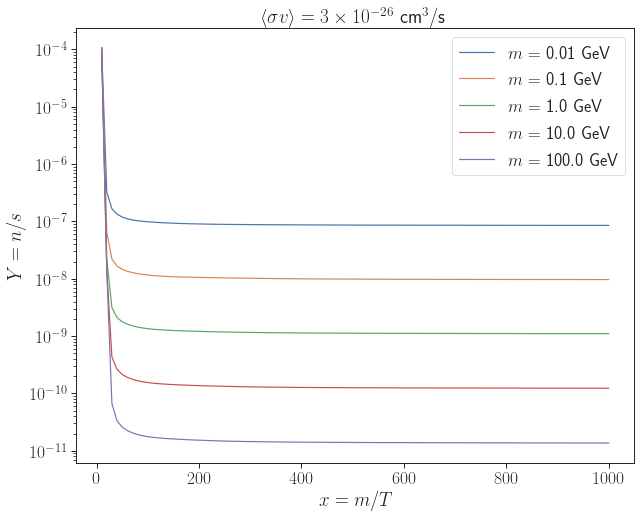

In [5]:
# Plotting Y(m)
ms = np.logspace(-2,2,num=5)
plt.figure(figsize=(10,8))
for m in ms:
    Y, xs, omegah2 = solver(m=m)
    plt.plot(xs, Y, label=r"$m =$ "+str(round(m,2))+" GeV")
    display(Latex(r"For $m = "+str(round(m,2))+"$ GeV, we get $\Omega h^2 = "+str(round(omegah2,3))+"$"))
plt.yscale('log')
plt.xscale('linear')
plt.ylabel(r'$Y=n/s$')
plt.xlabel(r'$x=m/T$')
plt.title(r"$\langle\sigma v\rangle = "+str(round(3,1))+"\\times 10^{-26} $ cm$^3/$s")
plt.legend()
plt.show()

/home/soutone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

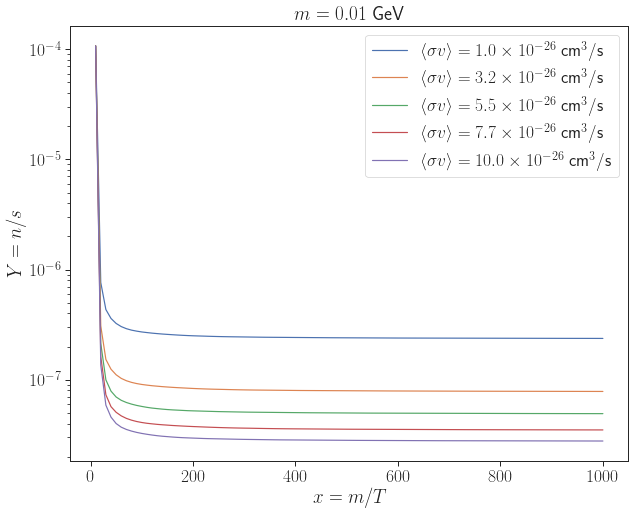

In [6]:
# Plotting Y(sigmav)
sigmavs = np.linspace(1e-26,1e-25,num=5)
plt.figure(figsize=(10,8))
for sigmav in sigmavs:
    Y, xs, omegah2 = solver(sigmav=sigmav)
    plt.plot(xs, Y, label=r"$\langle\sigma v\rangle = "+str(round(sigmav*10**26,1))+"\\times 10^{-26} $ cm$^3/$s")
    display(Latex(r"For $\langle\sigma v\rangle = "+str(round(sigmav*10**26,1))+"\\times 10^{-26} $ cm$^3/$s, we get $\Omega h^2 = "+str(round(omegah2,3))+"$"))
plt.yscale('log')
plt.xscale('linear')
plt.ylabel(r'$Y=n/s$')
plt.xlabel(r'$x=m/T$')
plt.title(r"$m="+str(0.01)+"$ GeV")
plt.legend()
plt.show()

/home/soutone/.local/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log


<IPython.core.display.Latex object>

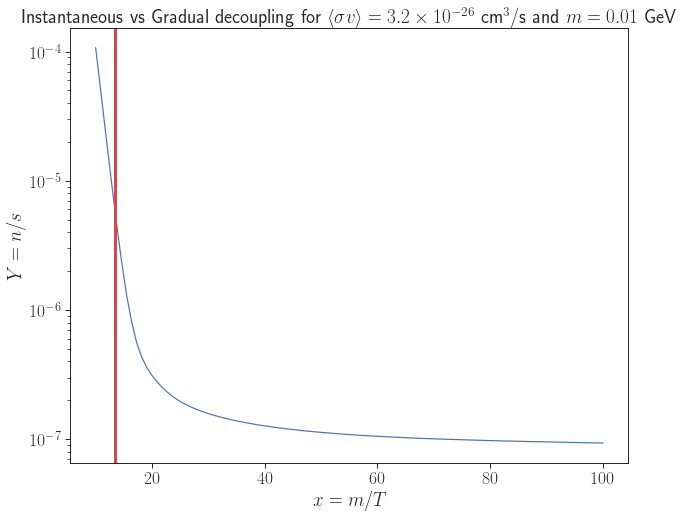

<IPython.core.display.Latex object>

In [7]:
# Comparing instantaneous decoupling to gradual decoupling:
T_fo = 0.739885e6
m = 0.01
sigmav = 3.2e-26
Y, xs, omegah2 = solver(sigmav=sigmav, m=m,x=[10,100])
plt.figure(figsize=(10,8))
plt.plot(xs, Y)
display(Latex(r"For $\langle\sigma v\rangle = "+str(round(sigmav*10**26,1))+"\\times 10^{-26} $ cm$^3/$s and $m = "+str(round(m,3))+"$ GeV we get $\Omega h^2 = "+str(round(omegah2,3))+"$"))
plt.yscale('log')
plt.xscale('linear')
plt.ylabel(r'$Y=n/s$')
plt.xlabel(r'$x=m/T$')
plt.axvline(x=m*10**9/T_fo, color="r",linewidth=3)
plt.title(r"Instantaneous vs Gradual decoupling for $\langle\sigma v\rangle = "+str(round(sigmav*10**26,1))+"\\times 10^{-26} $ cm$^3/$s and $m = "+str(round(m,3))+"$ GeV")
plt.show()
display(Latex(r"Red vertical line represents $x_{fo}=m/T_{fo}$ for instantaneous freeze-out. $T_{fo}="+str(round(T_fo*10**-6,2))+"$ MeV"))